<a href="https://colab.research.google.com/github/kylebrechin/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [6]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv'
boot = pd.read_csv(url)
boot.drop('Unnamed: 0', axis=1, inplace=True)
boot.head()


,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [3]:
boot_20 = boot.sample(20, random_state=42)
boot_200 = boot.sample(200, random_state=42)
boot_20.head(3)

,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
1330,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;DevOps specialist;Front-end...,3-5 years,3-5 years,86120.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,25 - 34 years old,White or of European descent


**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [4]:
mean_20  = np.mean(boot_20['ConvertedSalary'])
mean_200 = np.mean(boot_200['ConvertedSalary'])
print("20 mean:", mean_20)
print("200 mean:", mean_200)

20 mean: 55752.2
200 mean: 68551.255


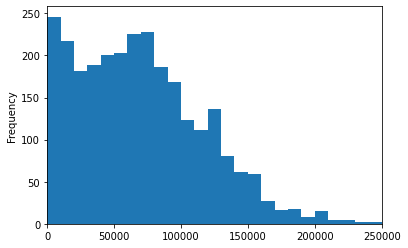

In [11]:
boot['ConvertedSalary'].plot(kind='hist', bins=50, xlim=(0,250000))

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I would trust the sample with 200, a larger sample size gives a more accurate representation of population mean.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

Given the differences between the two means, the high and lows could have a lot of variance that the samples aren't capturing.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



We give the confidence interval and the margin of error when reporting these numbers.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [ ]:
print("20:", boot_20['ConvertedSalary'].mean())
print("200:", boot_200['ConvertedSalary'].mean())

In [ ]:
conf_freq_20 = stats.t.interval(0.95, boot.shape[0], loc = boot_20['ConvertedSalary'].mean(), scale = stats.sem(boot['ConvertedSalary']))
conf_freq_200 = stats.t.interval(0.95, boot.shape[0], loc = boot_200['ConvertedSalary'].mean(), scale = stats.sem(boot['ConvertedSalary']))
print("20:", conf_freq_20)
print("200:", conf_freq_200)

In [ ]:
conf_bay_20 = stats.bayes_mvs(boot_20['ConvertedSalary'], alpha=.95)[0][1]
conf_bay_200 = stats.bayes_mvs(boot_200['ConvertedSalary'], alpha=.95)[0][1]
print("20:", conf_bay_20)
print("200:", conf_bay_200)

20: (35805.103096255356, 75699.29690374463)
200: (60593.058804479086, 76509.45119552092)


In [12]:
# code from prevous lecture
# double check the confidence intervals are accurate after using stats.bayes_mvs
def confidence_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1) # just looking up the corresponding t-stat.
    return (mean, mean - moe, mean + moe)

In [16]:
print(confidence_interval(boot_20['ConvertedSalary']))
print(confidence_interval(boot_200['ConvertedSalary']))

(55752.2, 35805.10309625536, 75699.29690374463)
(68551.255, 60593.058804479086, 76509.45119552092)


In [ ]:
# The confidence interval of the first sample is larger due to the low sample size.

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [24]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Confidence interval: (35872.392631018534, 75632.00736898146)
Mean 20: 55752.2


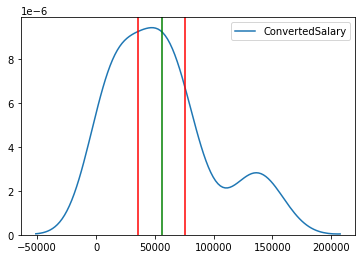

In [31]:
# sample 20
conf_int=stats.t.interval(0.95, # alpha (ie, confidence level)
                 boot_20.shape[0], # length of sample
                 loc = boot_20['ConvertedSalary'].mean(), # mean
                 scale = stats.sem(boot_20['ConvertedSalary']) # std error of the mean
                 )
print("Confidence interval:",conf_int)
print("Mean 20:", mean_20)

sns.kdeplot(boot_20['ConvertedSalary'])
plt.axvline(x=conf_int[1], color='red')
plt.axvline(x=conf_int[0], color='red')
plt.axvline(x=mean_20, color='green');




Confidence interval: (60593.30223951439, 76509.20776048562)
Mean 200: 68551.255


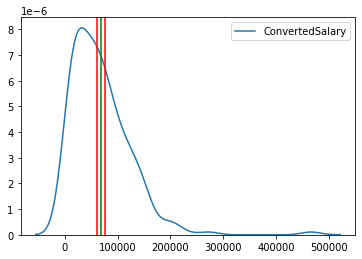

In [29]:
# sample 200
conf_int=stats.t.interval(0.95, # alpha (ie, confidence level)
                 boot_200.shape[0], # length of sample
                 loc = boot_200['ConvertedSalary'].mean(), # mean
                 scale = stats.sem(boot_200['ConvertedSalary']) # std error of the mean
                 )
print("Confidence interval:",conf_int)
print("Mean 200:", mean_200)

sns.kdeplot(boot_200['ConvertedSalary'])
plt.axvline(x=conf_int[1], color='red')
plt.axvline(x=conf_int[0], color='red')
plt.axvline(x=mean_200, color='green');



The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

<ErrorbarContainer object of 3 artists>

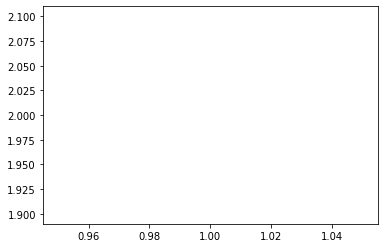

In [53]:
# no idea
# MPL documentation sucks
plt.errorbar(1,2)

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

In [67]:
# why is this being drawn with a bar? shouldn't it be a KDE plot?
# would be great if this was explained or something..
# like statistics was
# oh wait.
# plt.nope.

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [ ]:
# I don't understand any of this horribly explained garbage.
# book? video? not start at advanced stats and skip the basics?

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.